**Aikins Acheampong**

CS 251/2: Data Analysis and Visualization

Fall 2024

Project 5: Clustering

In [15]:
import numpy as np
import matplotlib.pyplot as plt

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)


# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a. Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [16]:
from matplotlib.image import imread

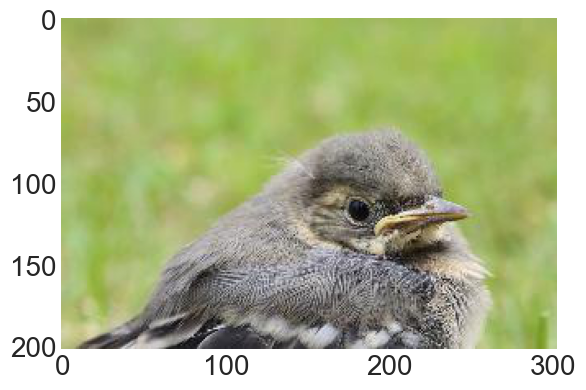

(202, 303, 3)

In [17]:

bird = imread("data/baby_bird.jpg")
plt.imshow(bird)
plt.grid(False)
plt.show()
bird.shape

### 2b. Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [18]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    return np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2]))

In [19]:
birdFlat = flatten(bird)
birdFlat.shape

(61206, 3)

### 2c. Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [20]:
bird_KMeans = kmeans.KMeans(birdFlat)
bird_KMeans.cluster()

bird_KMeans.replace_color_with_centroid()

### 2d. Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions and cast the ndarray so that it stores ints.
- Plot it below.

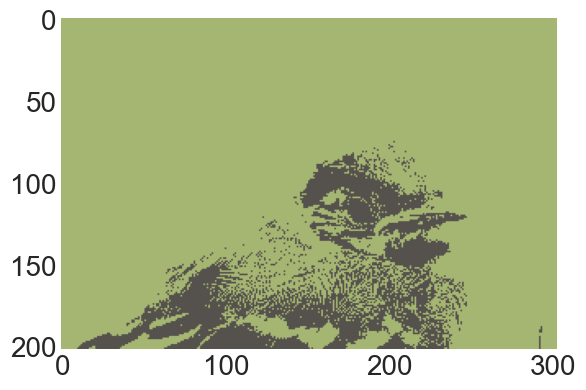

In [21]:
clusteredImg = bird_KMeans.get_data()
clusteredImg2D = clusteredImg.reshape(bird.shape)
clusteredImg2D = clusteredImg2D.astype(int)
plt.imshow(clusteredImg2D)
plt.grid(False)
plt.show()

### 2e. Run K-means and compress an image of your choice

Smaller images run a lot faster.

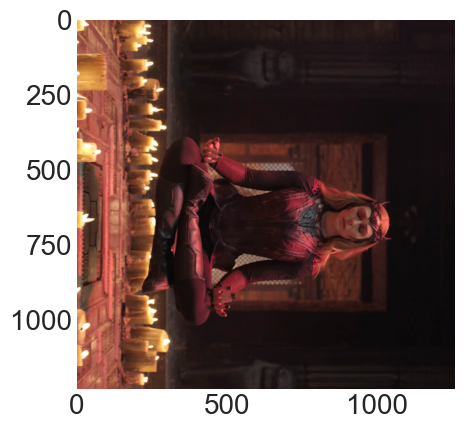

(1230, 1257, 3)

In [22]:
wanda = imread("data/wanda.jpg")
for i in range(3):
    wanda = np.rot90(wanda)
plt.imshow(wanda)
plt.grid(False)
plt.show()
wanda.shape

In [23]:
picFlat = flatten(wanda)
picMeans = kmeans.KMeans(picFlat)
picMeans.cluster(k=3)
picMeans.replace_color_with_centroid()

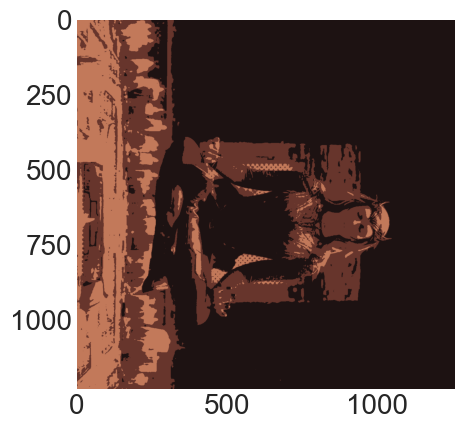

In [24]:
picCompressed = picMeans.get_data()
picCompressed2D = picCompressed.reshape(wanda.shape)
picCompressed2D = picCompressed2D.astype(int)
plt.imshow(picCompressed2D)
plt.grid(False)
plt.show()

## Extensions

### a. Reminder: AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **generative AI (e.g. ChatGPT, Copilot, etc.) is strongly discouraged.** If you do use it, you should use it either at the micro scale (e.g. to better understand syntax of a particular command) or at the outline level (e.g. to get a basic idea).

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1) Image compression

- Run K-means on other images and quantify the reduction in space (i.e. compression ratio) required to store each image (with different values of k).

*For credit, you must cite your exact sources (specific websites, textbooks, etc.)*

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

*For credit, you must cite your exact sources (specific websites, textbooks, etc.)*

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.

*For credit, you must cite your exact sources (specific websites, textbooks, etc.)*

### 7) K-means++

- Research and implement the K-means++ algorithm for initializing the centroids in K-means.

*For credit, you must cite your exact sources (specific websites, textbooks, etc.)*